In [1]:
%cd ../..

e:\github\Customize-HTML-template-project


In [ ]:
from notebooks.graph.edits_scraper import reco_chain, RecoQuestionResponse

In [3]:
with open(r'data\test_html.html', 'r') as f:
    html = f.read()

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

In [5]:
class State(TypedDict):
    conversation: Annotated[list, add_messages]
    response: str 
    is_conversation_finished: bool 


graph_builder = StateGraph(State)

In [6]:
def chatbot(state: State):
    msgs= state["conversation"]

    ai_response = reco_chain.invoke({"conversation":msgs})

    return {"conversation": [("ai",ai_response.model_dump_json())], 
            "is_conversation_finished":ai_response.is_conversation_finished,
            "response": ai_response.response }

In [7]:
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

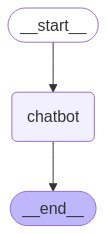

In [8]:
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [10]:
config = {"configurable": {"thread_id": "saleh"}}

In [11]:
res = graph.invoke({"conversation":[
    ("user", html)
]},config)
print( res["response"])
print( res["is_conversation_finished"] )

The landing page tells a compelling story, but the hero image is currently sourced from a placeholder. To make it truly shine, would you like to replace `/api/placeholder/600/400` with a specific image URL that reflects your brand or product?
False


In [12]:
res = graph.invoke({"conversation":[
    ("user", "no i want to change the name of the company to salo7ty")
]},config)
print( res["response"] )
print( res["is_conversation_finished"] )

The narrative currently features 'Quantum' as the company name. Shall we replace all instances of 'Quantum' with 'Salo7ty' to maintain brand consistency throughout the page?
False


In [13]:
res = graph.invoke({"conversation":[
    ("user", "yes all")
]},config)
print( res["response"] )
print( res["is_conversation_finished"] )

Alright, Salo7ty it is! Besides the company name, the testimonials section mentions 'TechCorp'. Should we also update 'TechCorp' to reflect a client company name more relevant to Salo7ty, or leave it as is?
False


In [14]:
res = graph.invoke({"conversation":[
    ("user", "okay yes of course")
]},config)
print( res["response"] )
print( res["is_conversation_finished"] )

Great! What name would you like to use instead of 'TechCorp' in the testimonial?
False


In [15]:
res = graph.invoke({"conversation":[
    ("user", "end")
]},config)
print( res["response"] )
print( res["is_conversation_finished"] )

None
True


In [25]:
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
import json

conv_data = []
for msg in res["conversation"]:
    role = None
    content = None
    if isinstance(msg, HumanMessage):
        role = "user"
        content = msg.content
    elif isinstance(msg, SystemMessage):
        role = "system"
        content = msg.content
    elif isinstance(msg, AIMessage):
        role = "ai"
        content = RecoQuestionResponse(**json.loads(msg.content)).response

    conv_data.append((role, str(content)))

In [26]:
conv_data

[('user',
  '<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <title>Modern Landing Page</title>\n  \n\n<body>\n  <!-- Header & Navigation -->\n  <header>\n    <div class="container">\n      <nav>\n        <a href="#" class="logo">Quantum</a>\n        <div class="menu-toggle" id="menuToggle">\n          <span class="bar"></span>\n          <span class="bar"></span>\n          <span class="bar"></span>\n        </div>\n        <div class="nav-links" id="navLinks">\n          <a href="#features">Features</a>\n          <a href="#testimonials">Testimonials</a>\n          <a href="#pricing">Pricing</a>\n          <a href="#contact">Contact</a>\n        </div>\n        <button class="btn">Get Started</button>\n      </nav>\n    </div>\n  </header>\n\n  <!-- Hero Section -->\n  <section class="hero">\n    <div class="container">\n      <div class="hero-content">\n        <div class="hero-text">\

In [ ]:
from notebooks.graph.summrizer import filter_chain
res_summerize = filter_chain.invoke({
    "conversation": conv_data
})

In [28]:
res_summerize

' , okay so here are the edits :\n\n1.  Replace all instances of "Quantum" with "Salo7ty".\n2.  Replace "TechCorp" with a new client company name in the testimonial section (awaiting the new name).'